In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
df = pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
from sklearn.preprocessing import LabelEncoder
df["sex"] = LabelEncoder().fit_transform(df["sex"])
df["smoker"] = LabelEncoder().fit_transform(df["smoker"])
df["region"] = LabelEncoder().fit_transform(df["region"])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


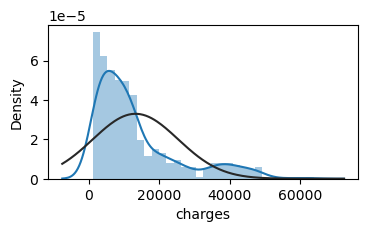

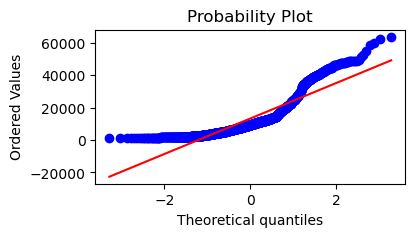

In [7]:
#Lets check the ditribution of the target variable (charges)
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm,probplot
# figure size in inches
rcParams['figure.figsize'] = 4,2

sb.distplot(df['charges'], fit=norm)

#Get the QQ-plot
fig = plt.figure()
res = probplot(df['charges'], plot=plt)
plt.show()

4


<AxesSubplot:xlabel='region', ylabel='count'>

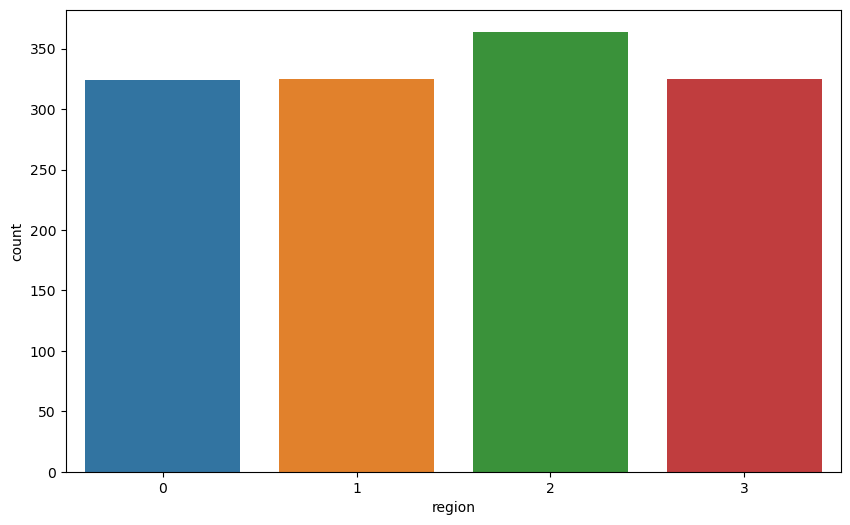

In [9]:
#Product Category.
import seaborn as sb
from matplotlib import rcParams
print (len(df['region'].value_counts()))

rcParams['figure.figsize'] = 10,6
sb.countplot(df['region'].sort_values(ascending = True))

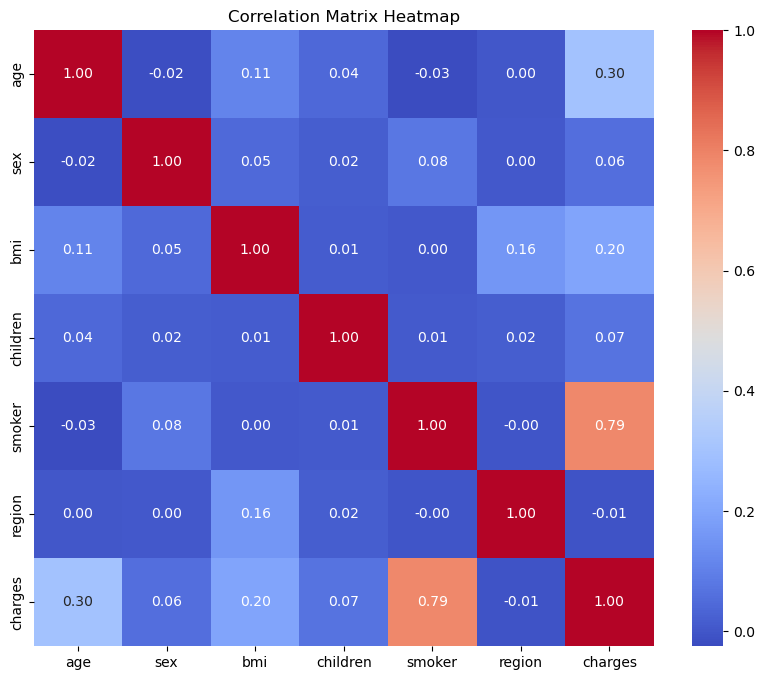

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set title
plt.title('Correlation Matrix Heatmap')

# Show plot
plt.show()

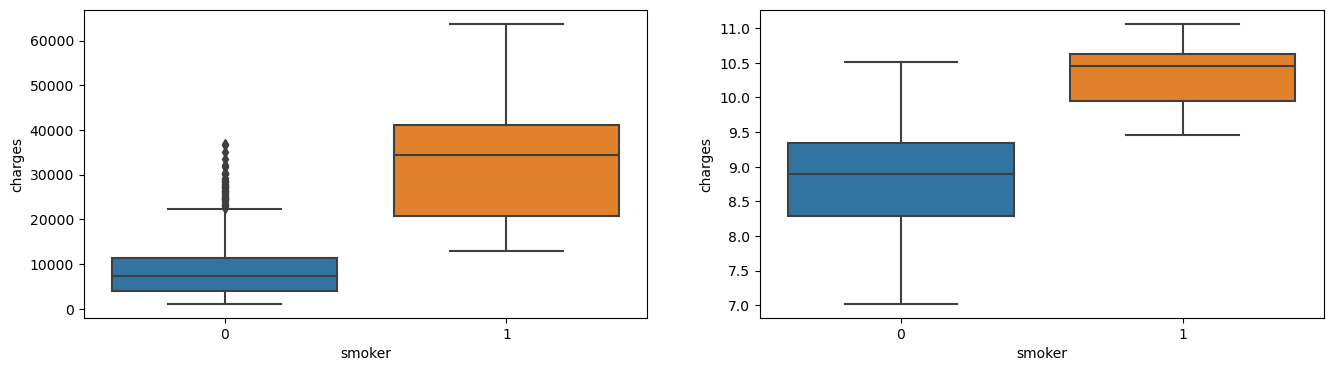

In [12]:
#Lets check the orders by warehouse.
import matplotlib.pyplot as plt
import numpy as np
#Checking with Boxplots
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 16,4
f, axes = plt.subplots(1, 2)
#Regular Data
fig3 = sb.boxplot( df['smoker'],df['charges'], ax = axes[0])
#Data with Log Transformation
fig4 = sb.boxplot( df['smoker'], np.log1p(df['charges']),ax = axes[1])

In [13]:
new_index=['charges','age','sex','bmi','children','smoker', 'region']
df=df.reindex(columns=new_index)

In [14]:
features = len(df.columns)
y = df.iloc[:, 0:1].values
X = df.iloc[:, 1:features].values

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size = 0.5)

In [20]:
#Decsion Tree Regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mae', random_state=0).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 33277887.215782706
MAE: 2571.480425746269
r2_score: 0.7765926003679879


In [21]:
#Random Forests Regression
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor(criterion = "mse", max_leaf_nodes = 100).fit(X_train, y_train.ravel())
score = modelRF.score(X_test, y_test)
y_pred = modelRF.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 23410639.206232168
MAE: 2614.397074806708
r2_score: 0.842835273920062


In [22]:
from sklearn.svm import SVR
model = SVR(C=10000.0, kernel='rbf', gamma='auto', epsilon=0.1).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 28337002.241759766
MAE: 1915.8785730672325
r2_score: 0.8097626828545897


In [23]:
from sklearn.svm import SVR
model = SVR(C=10000.0, kernel='linear', gamma='auto', epsilon=0.1).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 52050994.27983482
MAE: 3484.242600925654
r2_score: 0.6505614312316214


In [24]:
#Support vector Regressions
from sklearn.svm import SVR
model = SVR(C=10000.0, kernel='poly', gamma='auto', epsilon=0.1).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 30501793.30150988
MAE: 2250.300753597398
r2_score: 0.795229598519355
